In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [9]:
from sklearn.datasets import load_breast_cancer

In [12]:
?load_breast_cancer

Signature: load_breast_cancer(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification
dataset.

=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
downloaded from:
https://goo.gl/U2Uwz2

Read more in the :ref:`User Guide <breast_cancer_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    appropriate dtypes (numeri

In [38]:
df,y = load_breast_cancer(return_X_y=True, as_frame=True)
X = df.copy()
df["cancer"] = y

# 0  benign
# 1  malignant
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


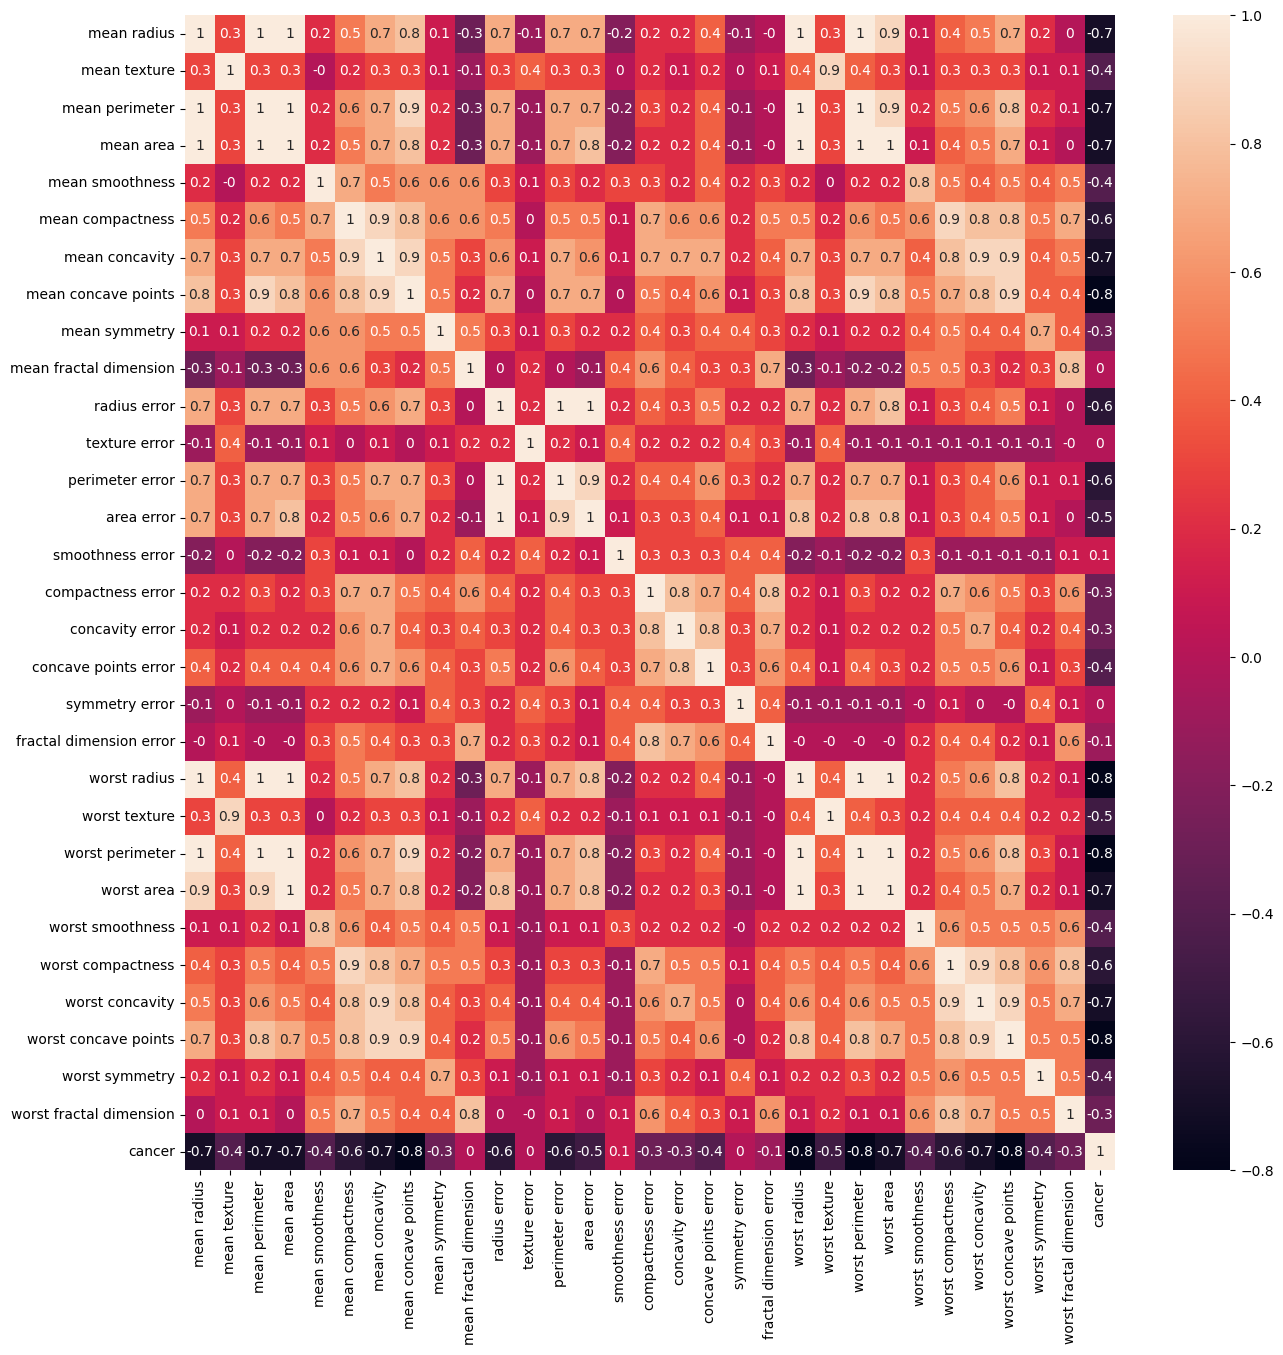

In [29]:
plt.figure(figsize=(15, 15))

sns.heatmap(df.corr().round(1),annot=True);

In [30]:
print("{:<23} {:<15} {:<10}".format("column", "mean", "std"))
for col in df.columns:
    mean = df[col].mean()
    std = np.sqrt(df[col].var())
    print("{:<23} {:<15.2f} {:<10.2f}".format(col, mean, std))

column                  mean            std       
mean radius             14.13           3.52      
mean texture            19.29           4.30      
mean perimeter          91.97           24.30     
mean area               654.89          351.91    
mean smoothness         0.10            0.01      
mean compactness        0.10            0.05      
mean concavity          0.09            0.08      
mean concave points     0.05            0.04      
mean symmetry           0.18            0.03      
mean fractal dimension  0.06            0.01      
radius error            0.41            0.28      
texture error           1.22            0.55      
perimeter error         2.87            2.02      
area error              40.34           45.49     
smoothness error        0.01            0.00      
compactness error       0.03            0.02      
concavity error         0.03            0.03      
concave points error    0.01            0.01      
symmetry error          0.02   

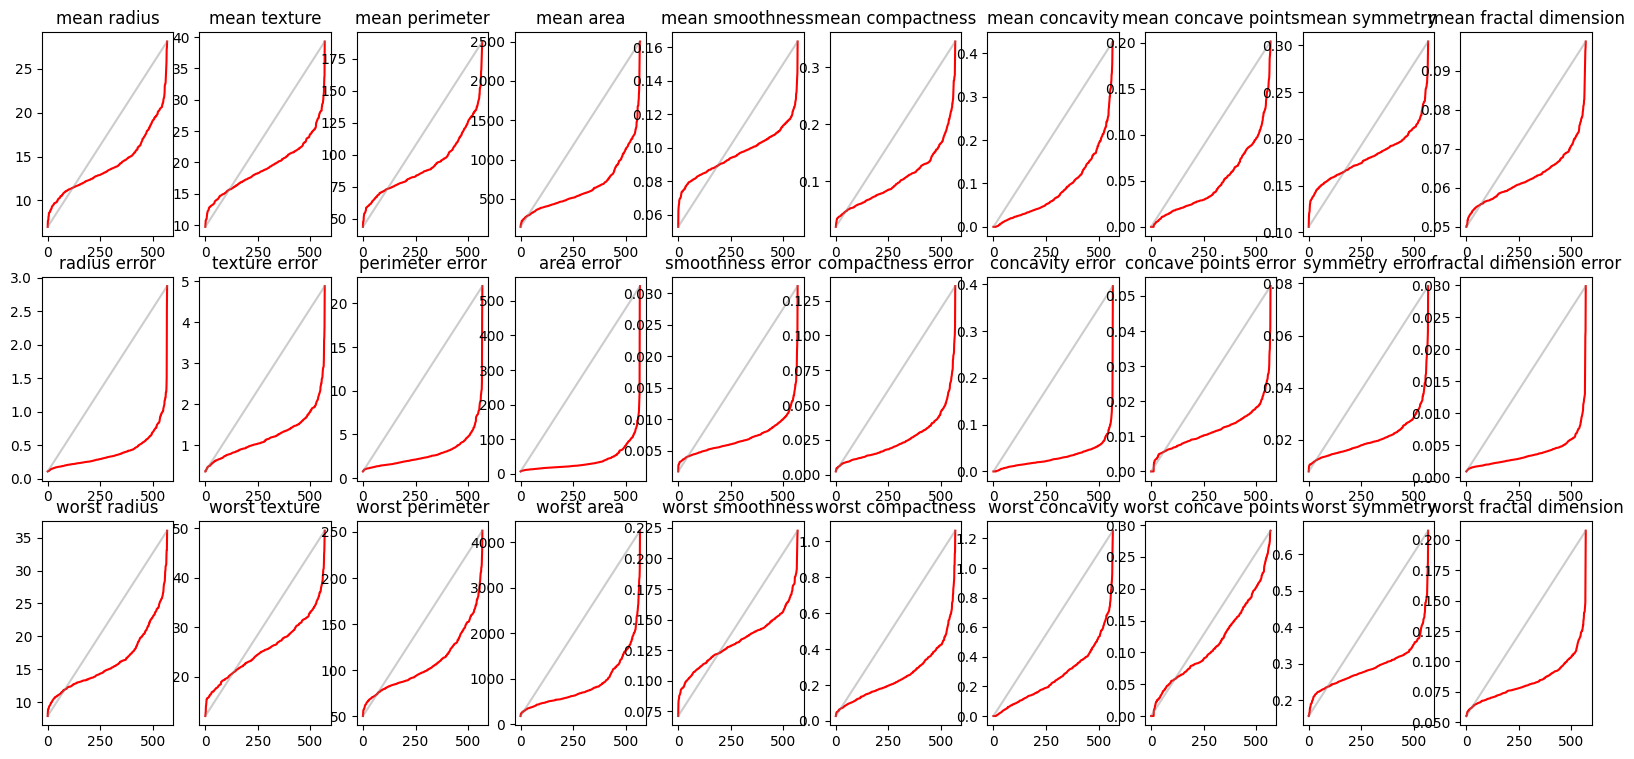

In [31]:
X_plot = df.drop("cancer",axis=1)
def plot_features(X,cols = X.columns):
    fig,ax = plt.subplots(3,len(cols)//3,figsize=(20,9))
    ax_flattened = ax.flatten()
    for i,j in enumerate(cols):
        ax_flattened[i].set_title(cols[i])
        ax_flattened[i].plot(sorted(X[:,i]),color='red');
        ax_flattened[i].plot(np.linspace(X[:,i].min(),X[:,i].max(), len(X[:,i])),color='grey',alpha=0.4);

plot_features(X_plot.to_numpy(),cols=X_plot.columns)

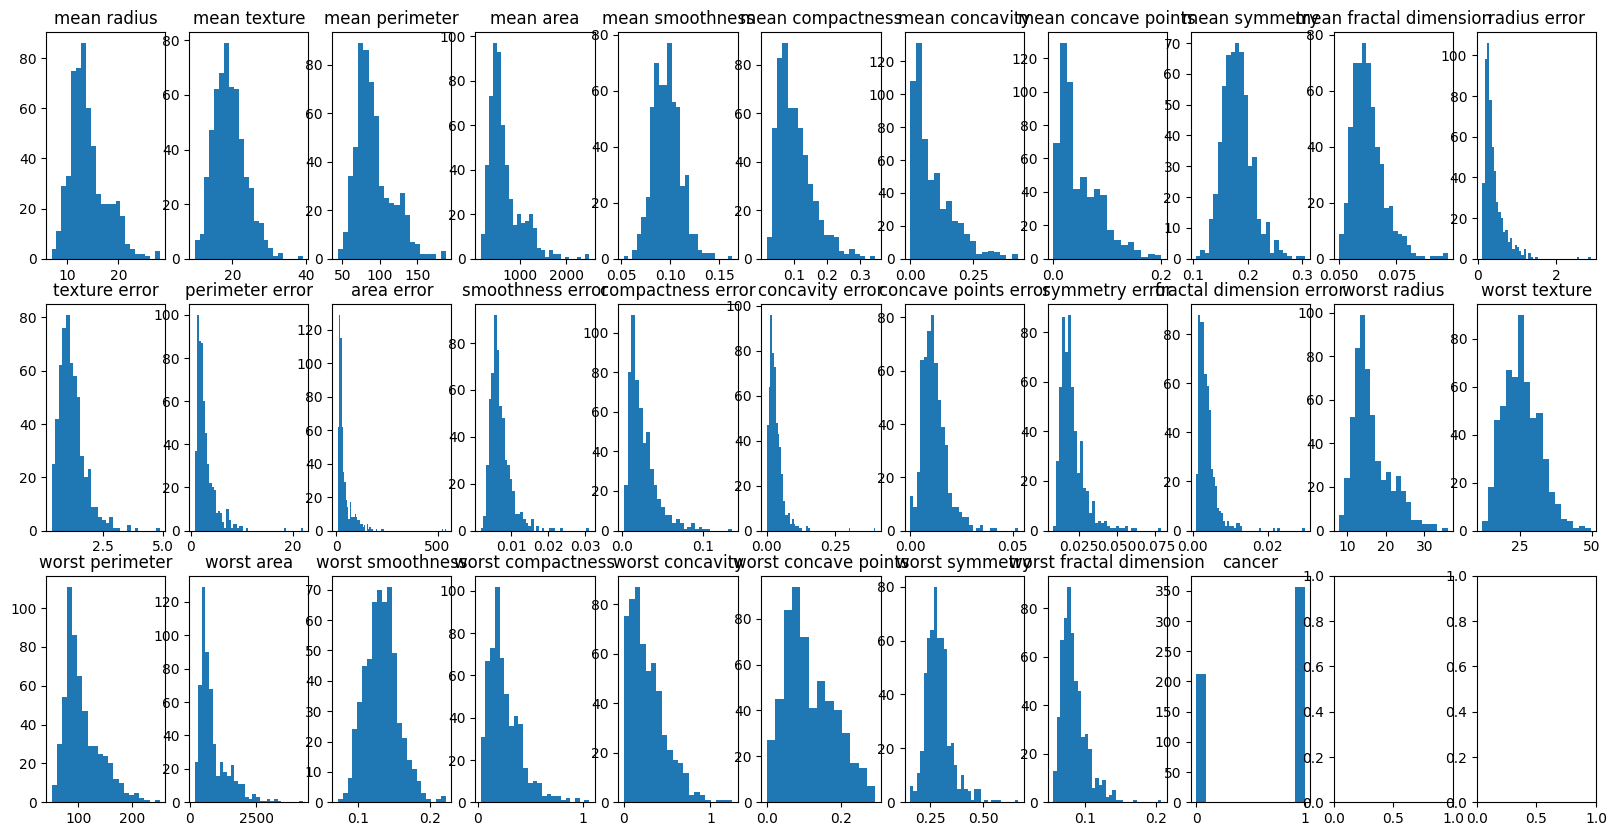

In [32]:
X_plot = df.drop("cancer",axis=1)

def plot_features_distribution(X,cols = X.columns):
    fig,ax = plt.subplots(3,len(cols)//3+ len(cols)%3 ,figsize=(20,10))
    ax_flattened = ax.flatten()
    for i,j in enumerate(cols):
        ax_flattened[i].set_title(cols[i])

        ax_flattened[i].hist(X[:,i], bins='auto')




plot_features_distribution(df.to_numpy(),cols=df.columns)

In [34]:
# 0  benign
# 1  malignant

len(df[df["cancer"] == 1]) /len(df),len(df[df["cancer"] == 1])

(0.6274165202108963, 357)

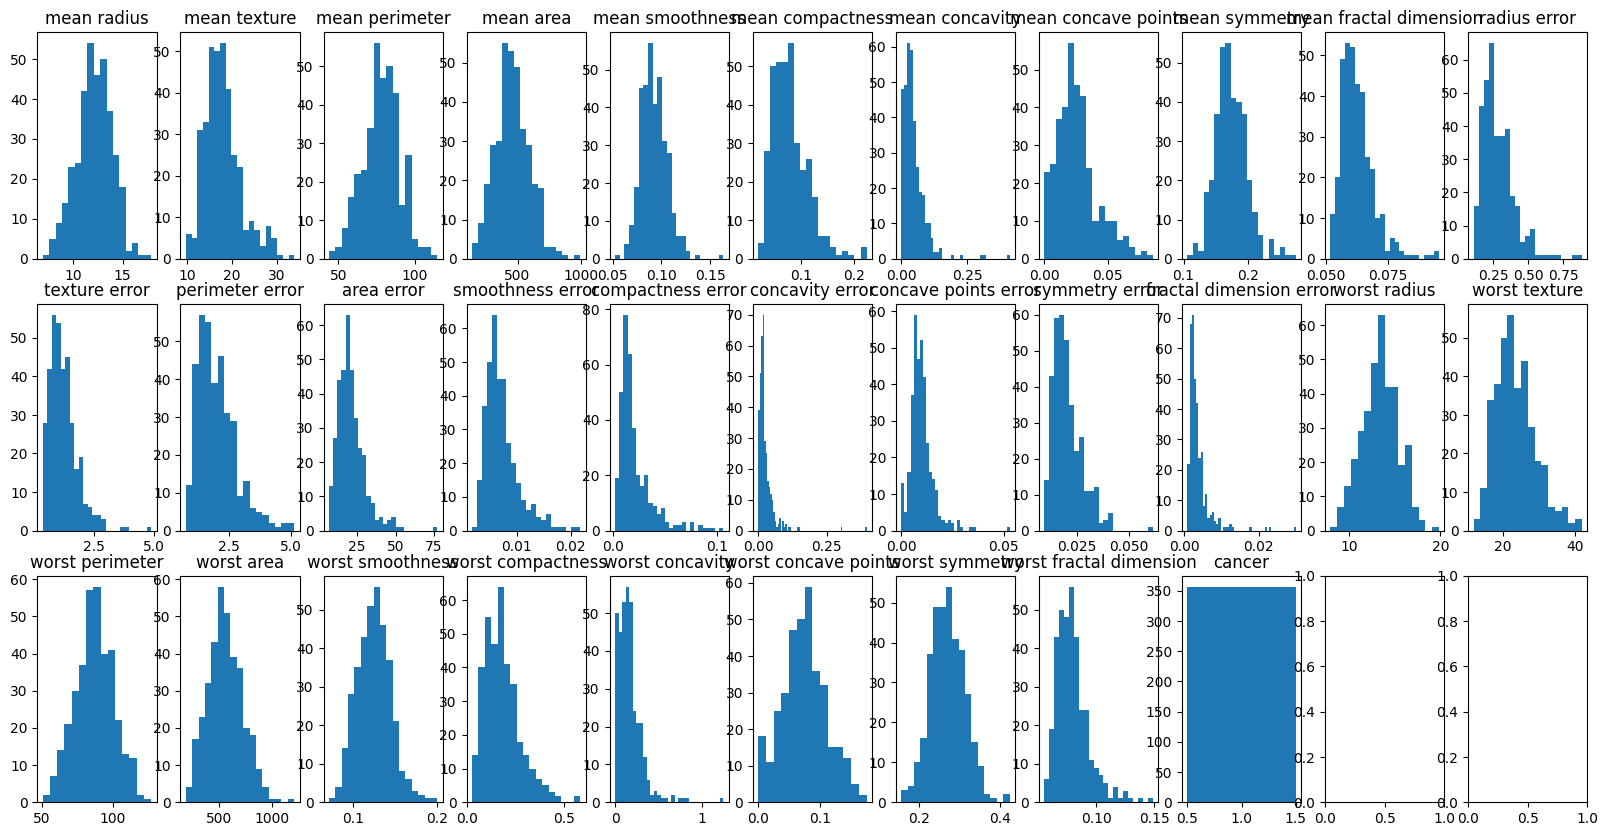

In [58]:
plot_features_distribution(df[df["cancer"] == 1].to_numpy(),cols=df.columns)

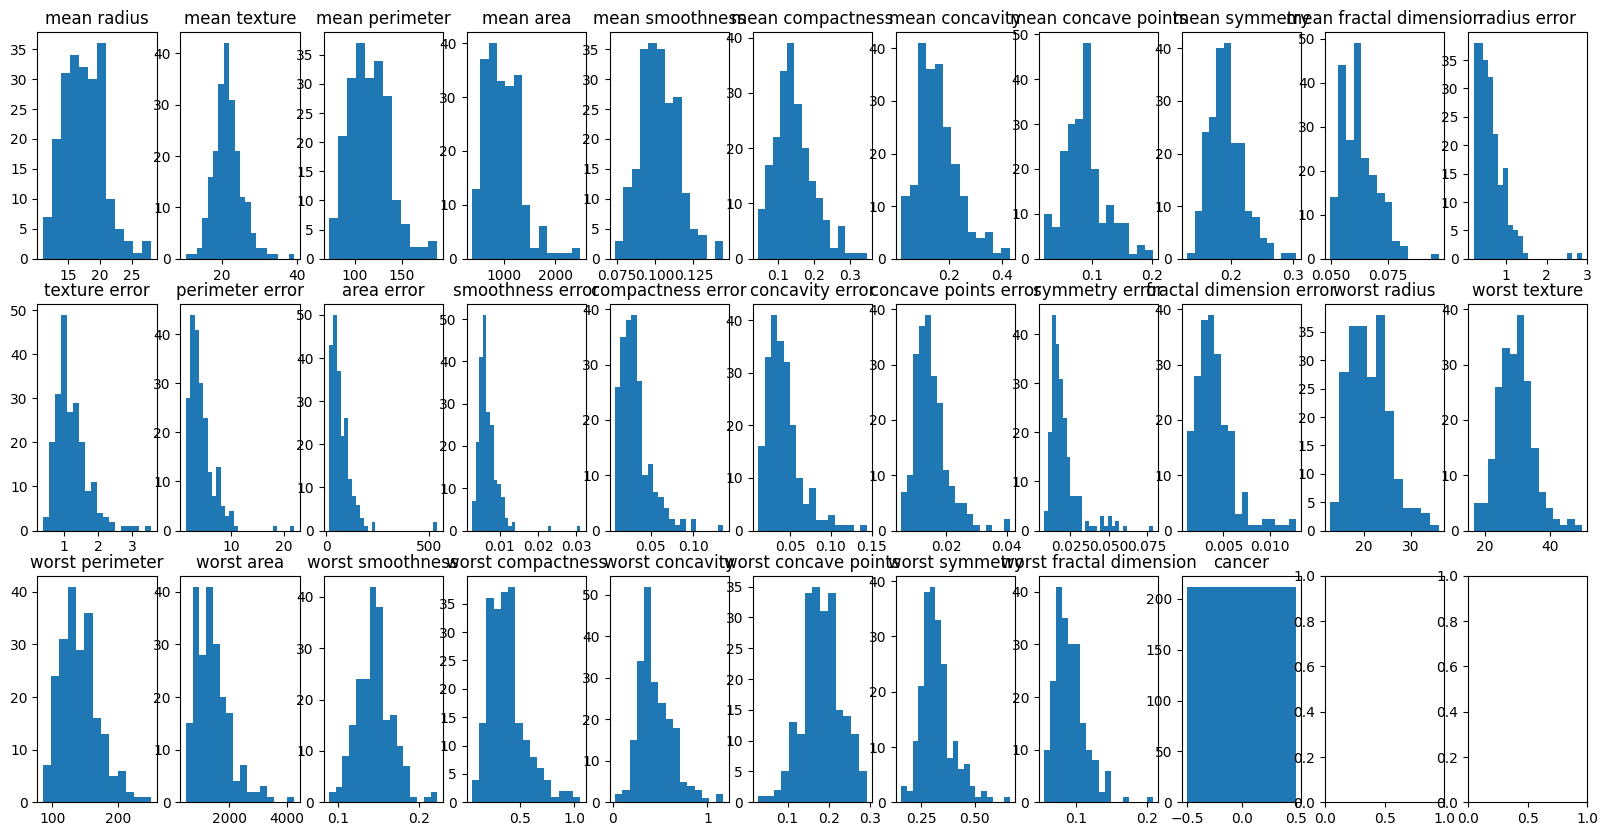

In [59]:
plot_features_distribution(df[df["cancer"] == 0].to_numpy(),cols=df.columns)

In [93]:
categories = ['1','0']
for cat,color in zip(categories,list(mcolors.TABLEAU_COLORS.keys())[0:len(categories)]):
    print(cat,color)
df[df["cancer"] == 1]["worst area"]
df[df['cancer'] == list(pd.unique(df['cancer']))[0]]['mean perimeter']


1 tab:blue
0 tab:orange


0      122.80
1      132.90
2      130.00
3       77.58
4      135.10
        ...  
563    143.00
564    142.00
565    131.20
566    108.30
567    140.10
Name: mean perimeter, Length: 212, dtype: float64

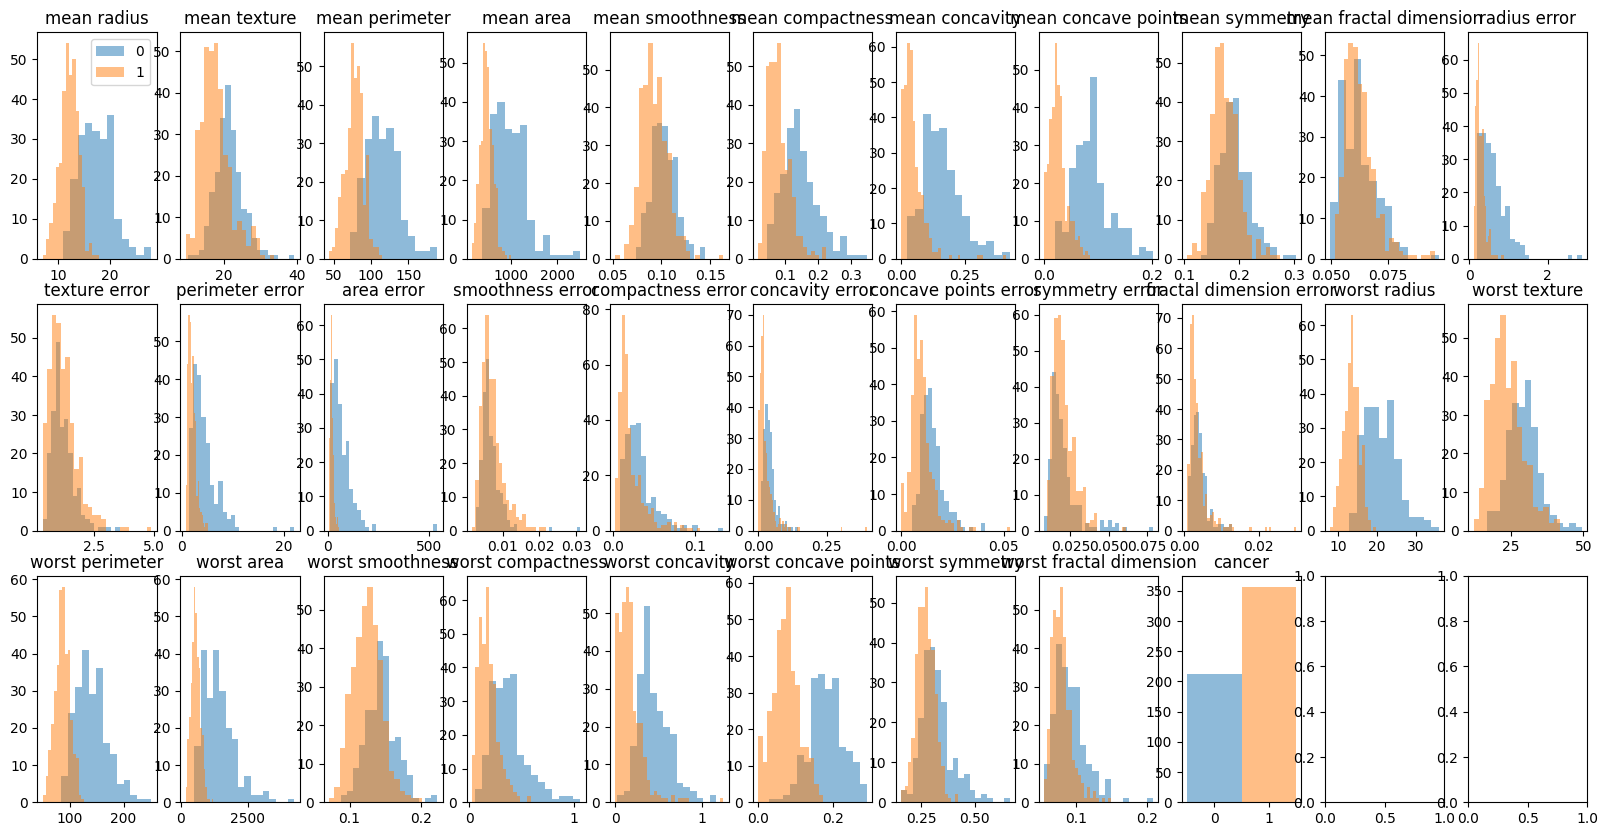

In [183]:
def plot_features_distribution_per_class(X,y,cols = X.columns,return_feature_separation_rank=False):
    fig,ax = plt.subplots(3,len(cols)//3+ len(cols)%3 ,figsize=(20,10))
    ax_flattened = ax.flatten()
    categories = list(pd.unique(y))
    opacity = 1/len(categories)
    ft_avg = {c:0 for c in cols}
    

    for i,j in enumerate(cols):
        
        for cat,color in zip(categories,list(mcolors.TABLEAU_COLORS.keys())[0:len(categories)]):
            ax_flattened[i].set_title(cols[i])
            if isinstance(X,pd.DataFrame):
                ax_flattened[i].hist(X[y == cat][j], bins='auto',color=color,alpha=opacity,label=cat)
                
            elif isinstance(X,np.ndarray):
                ax_flattened[i].hist(X[y == cat][:,i], bins='auto',color=color,alpha=opacity,label=cat)
            else: raise Exception("Not a dataframe nor a matrix")
            
        if return_feature_separation_rank:
            if isinstance(X,pd.DataFrame):
                ft_avg[j] = {cat:X[y == cat][j].values.ravel().mean() for cat in categories}
                # should divide by the mean of column
                
            elif isinstance(X,np.ndarray):
                ft_avg[j] = {cat:X[y == cat][:,i].mean() for cat in categories}
                
    
    ax_flattened[0].legend();
    if return_feature_separation_rank:
        # the data should be standardize for this ordenation make sense
        # for multiclass, could make a one-versus-all matrix to see how separable each class is by what column, just the upper triangle needed
        #           class 1   class2    class3    class4    class5
        # class1    {}        sep12     sep13     sep14     sep15
        # class2    {}        {}        sep23     sep24     sep25
        # class3    {}        {}        {}        sep34     sep35
        # class4    {}        {}        {}        {}        sep45
        # class5    {}        {}        {}        {}        {}
        
        ft_sep = {col:np.sqrt(np.sum(np.square(np.array(list(means.values()))))) for col,means in ft_avg.items()}
        ft_sep_sorted = {col: sep for col, sep in sorted(ft_sep.items(), key=lambda item: item[1],reverse=True)}
        return ft_sep_sorted
    
# 0  benign
# 1  malignant
plot_features_distribution_per_class(df,df['cancer'],cols=df.columns)

```features that seem useful = ['mean radius','mean texture','mean perimeter','mean area', 'mean compactness' 'mean concavity', 'mean concave points', 'radius erros', 'perimeter error','area error','worst radius', 'worst perimeter', 'worst area', 'worst compactness','worst concavity', 'worst concave points']```

In [39]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

{'worst concave points': 1.1976801091247258,
 'worst perimeter': 1.1816038854882482,
 'mean concave points': 1.1720952366561148,
 'worst radius': 1.1718536658462588,
 'mean perimeter': 1.120813874422242,
 'worst area': 1.107516739525706,
 'mean radius': 1.10178688134609,
 'mean area': 1.0700254552584927,
 'mean concavity': 1.0509726375130795,
 'worst concavity': 0.9955088948751831,
 'mean compactness': 0.9003113849915169,
 'worst compactness': 0.8919570882593263,
 'radius error': 0.8559399996241925,
 'perimeter error': 0.8393487674459547,
 'area error': 0.8274185973129836,
 'worst texture': 0.6895751697649825,
 'worst smoothness': 0.6360908480086613,
 'worst symmetry': 0.6282872566554907,
 'mean texture': 0.6266134946364076,
 'concave points error': 0.615833056127972,
 'mean smoothness': 0.5411523790533335,
 'mean symmetry': 0.49880102724240755,
 'worst fractal dimension': 0.48880026355837153,
 'compactness error': 0.4422056378996435,
 'concavity error': 0.38293864309214026,
 'fractal 

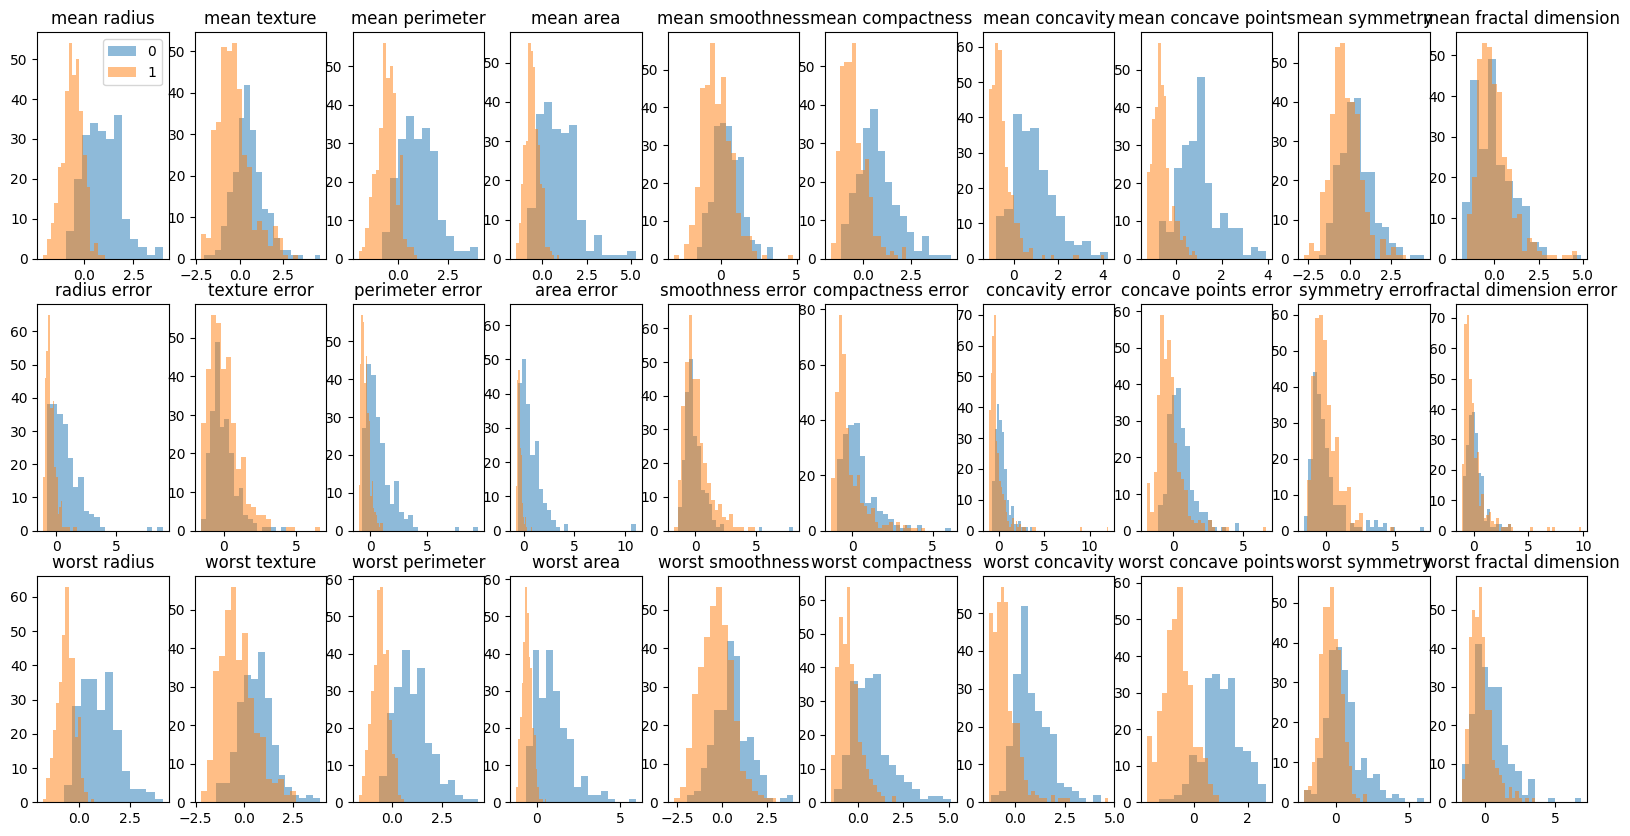

In [158]:
X_std = StandardScaler().fit_transform(X)
plot_features_distribution_per_class(X_std,y,cols=X.columns,return_feature_separation_rank=True)

(0.0040072436011824916, 0.01)

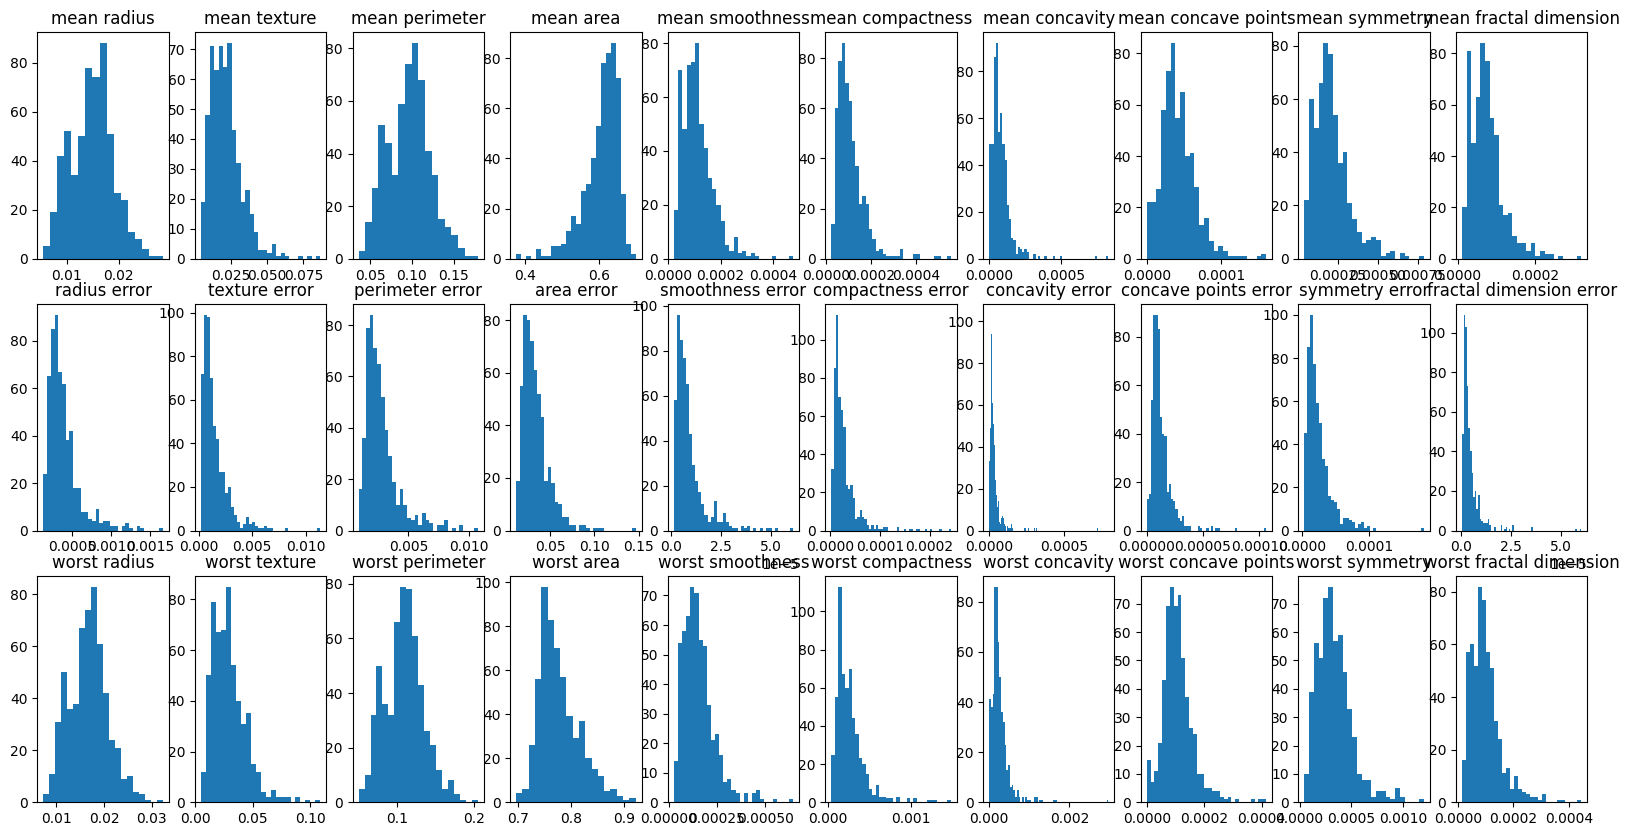

In [53]:
X_norm= Normalizer().fit_transform(X)
plot_features_distribution(X_norm,cols=X.columns)
X_norm[:,0].std(),X_norm[:,0].mean().round(2)

(0.16664067209574815, 0.34)

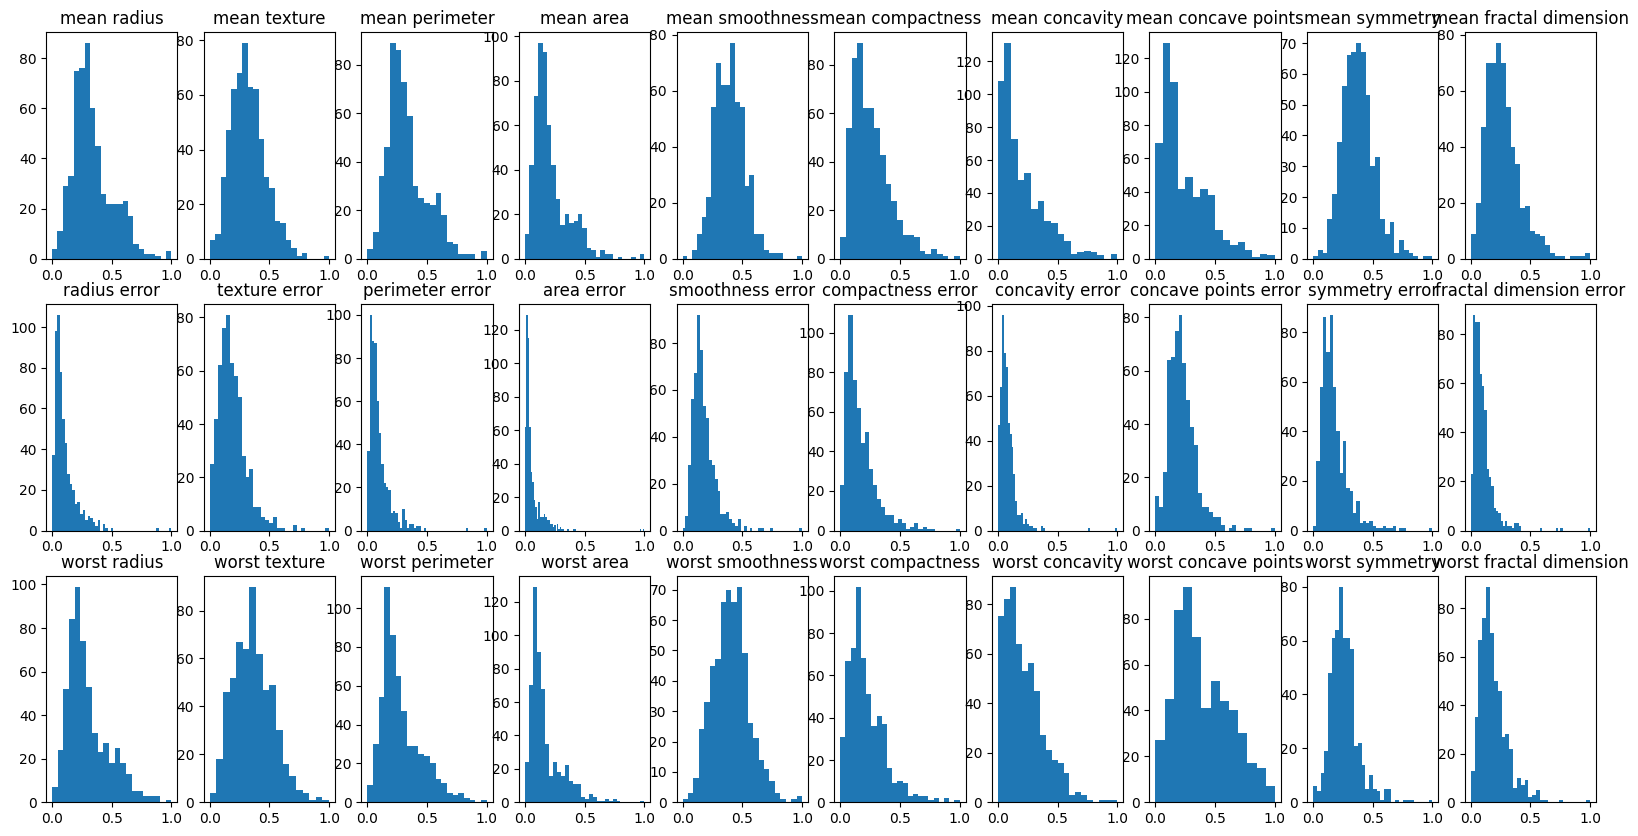

In [52]:
X_minmax = MinMaxScaler().fit_transform(X)
plot_features_distribution(X_minmax,cols=X.columns)
X_minmax[:,0].std(),X_minmax[:,0].mean().round(2)

In [54]:
pca=PCA(n_components=3,random_state=42)
pca.fit(X_minmax)

pca.explained_variance_ratio_

array([0.53097689, 0.1728349 , 0.07114442])

In [55]:
len(pca.components_[0]) ==  len(X.columns)

True

In [56]:
for j in range(len(pca.components_)):
    print(f"pca{j} :   ")
    dict_component = {col:pca.components_[j][i] for (i,col) in enumerate( X.columns) }
    
    min_val = sorted(dict_component.values())[-5]
    min_val = 0.01
    for i,col in enumerate( X.columns):
        if pca.components_[j][i] >= min_val:
            print("{:<23}: {:<15.2f}".format(col,pca.components_[j][i].round(2)))
            #print(f"{col}: {pca.components_[j][i].round(2)}",end="\t")
    print("\n\n",end="")

pca0 :   
mean radius            : 0.24           
mean texture           : 0.10           
mean perimeter         : 0.25           
mean area              : 0.22           
mean smoothness        : 0.11           
mean compactness       : 0.24           
mean concavity         : 0.30           
mean concave points    : 0.32           
mean symmetry          : 0.11           
mean fractal dimension : 0.04           
radius error           : 0.12           
perimeter error        : 0.12           
area error             : 0.10           
compactness error      : 0.13           
concavity error        : 0.07           
concave points error   : 0.12           
symmetry error         : 0.01           
fractal dimension error: 0.05           
worst radius           : 0.26           
worst texture          : 0.11           
worst perimeter        : 0.26           
worst area             : 0.21           
worst smoothness       : 0.12           
worst compactness      : 0.20           
worst 

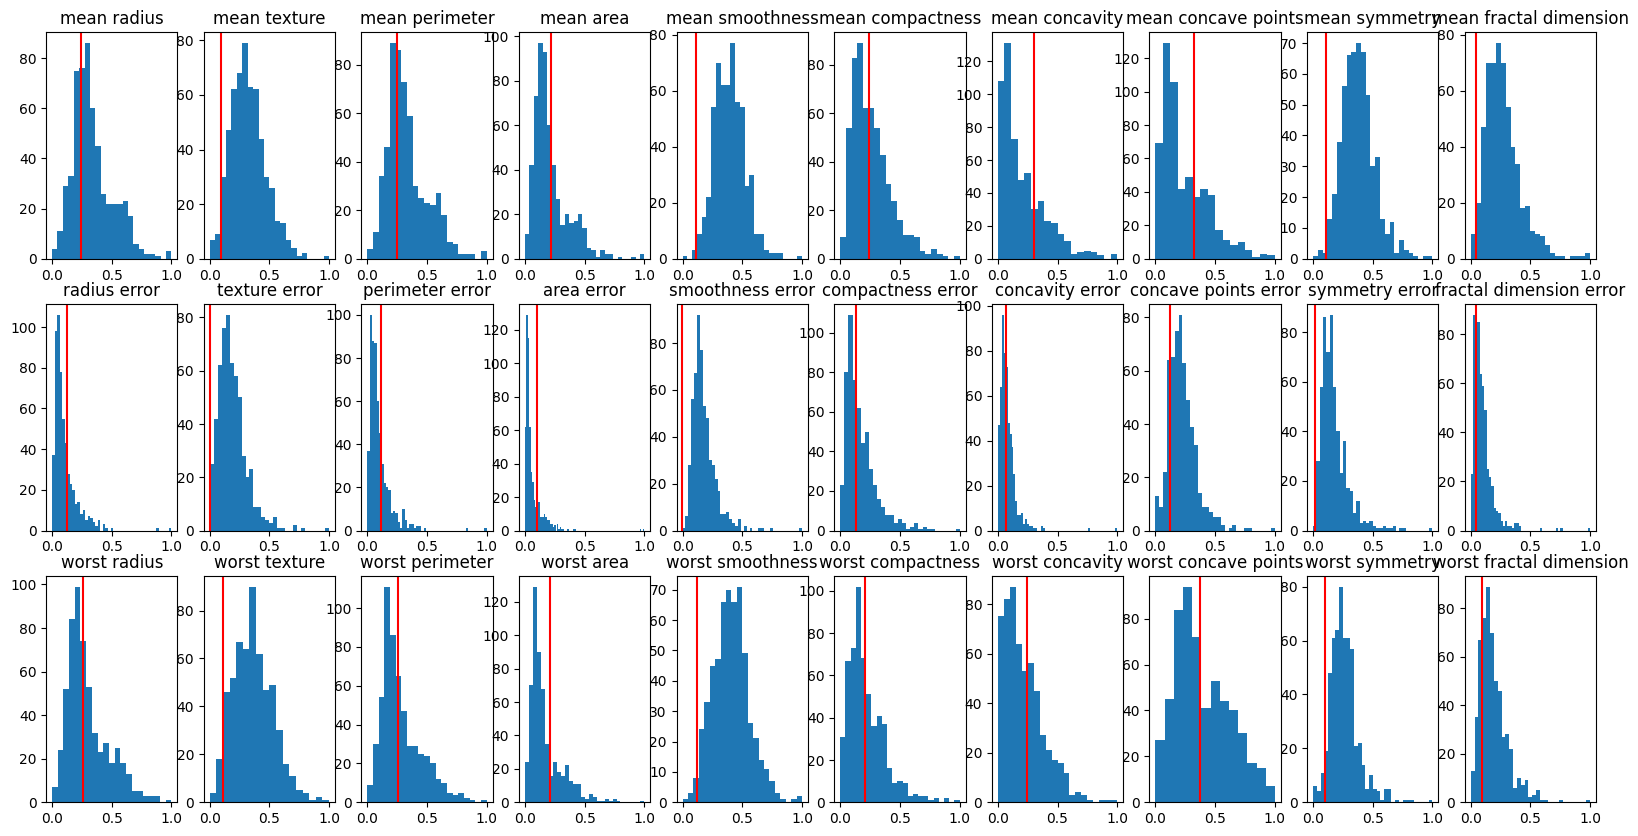

In [57]:
fig,ax = plt.subplots(3,len(X.columns)//3+ len(X.columns)%3 ,figsize=(20,10))
ax_flattened = ax.flatten()
for i,j in enumerate(X.columns):
    ax_flattened[i].set_title(X.columns[i])
    #ax_flattened[i].plot(pca.components_[0][i],color='red')
    ax_flattened[i].hist(X_minmax[:,i], bins='auto')
    ax_flattened[i].axvline(pca.components_[0][i],color='red')



In [177]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,log_loss,recall_score,roc_curve,roc_auc_score

In [135]:
all_ones = np.ones(len(y))

accuracy_score(y,all_ones)

0.6274165202108963

In [136]:
print(classification_report(y,all_ones))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.63      1.00      0.77       357

    accuracy                           0.63       569
   macro avg       0.31      0.50      0.39       569
weighted avg       0.39      0.63      0.48       569



/home/rick/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rick/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rick/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
for i in [accuracy_score,f1_score,log_loss,recall_score,roc_curve,roc_auc_score]:
    print(f"{i.__name__}:\t\t {i(y,all_ones)}")

accuracy_score:		 0.6274165202108963
f1_score:		 0.7710583153347732
log_loss:		 13.42926980402959
recall_score:		 1.0
roc_curve:		 (array([0., 1.]), array([0., 1.]), array([2., 1.]))
roc_auc_score:		 0.5


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split

In [182]:
clf = LogisticRegression(random_state=1,max_iter=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(X_train,y_train)

print(classification_report(y_test,clf.predict(X_test)))
print(clf.predict_proba(X_test)[0])

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.98      0.97      0.97       121

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

[0.13952677 0.86047323]


In [162]:
clf = LogisticRegression(random_state=1,max_iter=10000)

cv = pd.DataFrame(cross_validate(clf,X,y,cv=5,n_jobs=3,scoring=['f1','accuracy','balanced_accuracy','neg_log_loss','precision','recall']))
cv

,fit_time,score_time,test_f1,test_accuracy,test_balanced_accuracy,test_neg_log_loss,test_precision,test_recall
0,0.669153,0.013474,0.953020,0.938596,0.918605,-0.127312,0.910256,1.000000
1,0.575911,0.016877,0.958333,0.947368,0.939404,-0.125396,0.945205,0.971831
2,0.910037,0.020156,0.986111,0.982456,0.981151,-0.063493,0.986111,0.986111
3,0.539332,0.006847,0.944444,0.929825,0.924603,-0.178917,0.944444,0.944444
4,0.435950,0.012441,0.964029,0.955752,0.959926,-0.088232,0.985294,0.943662


In [165]:
from sklearn.pipeline import make_pipeline

In [168]:
def classification_tester(X,y,model,pipe_funcs=[], fixed_params={}, var_param_name=None, var_param_values=[]):
    metrics = ['f1','accuracy','balanced_accuracy','neg_log_loss','precision','recall']
    metrics_results = {"test_"+i:[] for i in metrics}
    
    for var_param_value in var_param_values:
        kwargs = {var_param_name: var_param_value}
        kwargs.update(fixed_params)
        reg = model(**kwargs)
        
        pipe = make_pipeline(*pipe_funcs,reg)
        
            
        cv = pd.DataFrame(cross_validate(pipe,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=(metrics)))
        for i in metrics:
            metrics_results["test_"+i].append(cv["test_"+i])
            

    fig, ax = plt.subplots(2,len(metrics)//2,figsize=(20, 9))
    ax_flattened = ax.flatten()
    for i,j in enumerate(metrics):
        ax_flattened[i].set_title(j)
        ax_flattened[i].boxplot(metrics_results["test_"+j],labels=["{:1.2f}".format(y) for y in var_param_values]);

    for i in metrics:
        print("max {}: {}".format(i,max(map(np.mean,metrics_results["test_"+i]))))

    #return metrics_results

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

max f1: 0.9654234548580636
max accuracy: 0.9561018626059276
max balanced_accuracy: 0.9508945513689346
max neg_log_loss: -0.1143206857503587
max precision: 0.9599798421392849
max recall: 0.9719887955182074


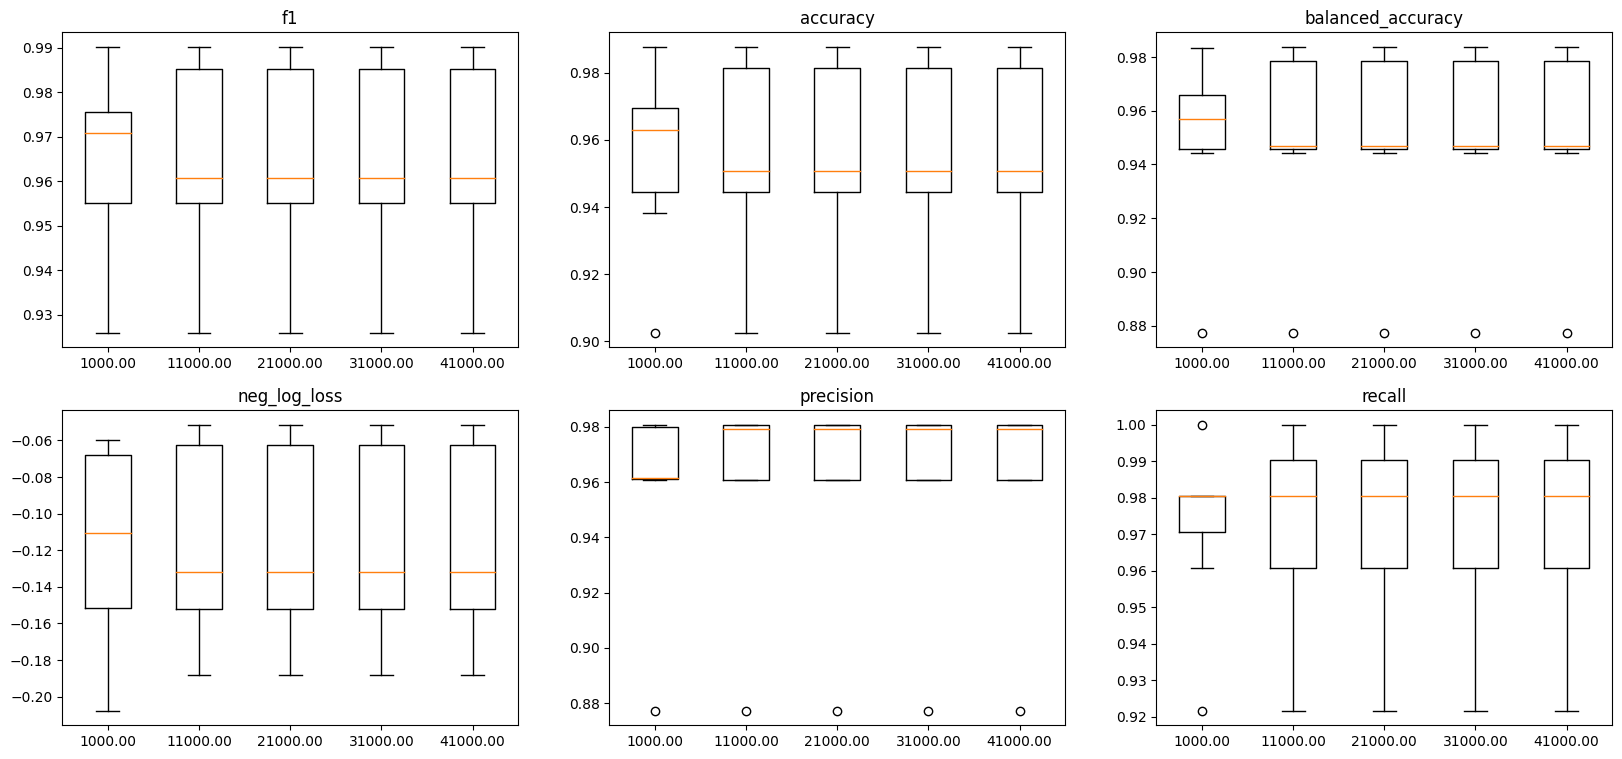

In [169]:
classification_tester(X,y,LogisticRegression,fixed_params={"random_state":1},var_param_name="max_iter",var_param_values=list(range(1000,50000,10000)))

### models to test: knn,lda,qda,naive bayes,tree,adaboost,xgboost,randomforest,svm,glm?,perceptron?
with reg, augmentation

- 1- understand the data
    - plot it
    - look at covariance
    - see distribuition
    - mean, median, variance, standard deviation, percentiles
    - boxplot, violinplot
- 2- eval skeleton and dumb baselines
    - fix random seed 
    - no augmentation, regularization, ensemble
    - train with just 0 inputs
    - overfit to little subset
    - check if loss is decresing 
- 3- model madness
    - test models, let them overfit, check train loss going to 0
    - understand their hyper parameters
    - slow and fixed learning rate!
    - add one "complexity" at a time
- 4- tame it
    - augment the data, bootstrap it, bag it, monte carlo it
    - regularize it, check if makes it better
    - let it overfit again
- 5- pimp my model, tuning
    - gridsearch, randomsearch, find good hyperparameters
- 6 squeeze out the juice
    - just then ensemble it